<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker with questions by Eefje Benschot and Rutger Bomans*
## Notebook 10: `pandas` for data analysis and visualization

In this Notebook, we continue with the `pandas` package, we learn how to read Excel data, we explore several datasets, and we create our own KML file to be used on Google Maps or Google Earth. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Create your own DataFrame
In the previous notebook, we started working with `pandas`. Data is stored in a `DataFrame`, which is a lot like a spreadsheet, except that it is scriptable. We learned how to read data from a csv file into a `DataFrame`. You can create your own `DataFrame` using `pd.DataFrame`. Input argument is `data`. The data is what is put in the columns and is entered as a dictionary (see previous Notebook) with one entry for every column of the `DataFrame`. The name (the key) in the dictionary is used for the name of the column and the entry is a list or array with all the values in the column. The index can be specified with the keyword argument `index` (the default is numbers starting at 0). The index can be a list or an array. Make sure that the index has the same length as the values in the columns. 

### Exercise 1, Bottle Cap Battle
In a student house in Delft, after opening a beer, the residents throw the cap at a vase. They keep track of the number of beers they open (for themselves and their guests) and the number of times they succeed in throwing the cap in the vase.  This data is shown in the Figure below. Use the names of the students as indices.

Build a DataFrame for the data in the figure and create a new column with the success rate of throwing the cap in the vase. Print the name of the student with the highest success rate to the screen and the corresponding success rate is (rounded to 2 decimal places). 
Compute the maximum and the location of the maximum without the use of a loop.

<img src="dataframe.png" width="250">. 

In [3]:
ind = ["Emilia", "Eloise", "Emma", "Eliot"]
data = [[36, 94, 18], [8, 38, 13], [36, 21, 1], [12, 67, 3]]
a = pd.DataFrame(data, index = ind, columns = ["Beers", "Beer_Guests", "Hits"])
a["Success_rate"] = a.Hits / (a.Beers + a.Beer_Guests)
print("The name of the student with the highest success rate is", a.Success_rate.idxmax(), "and the corresponding success rate is", round(a.Success_rate.max(), 2))

The name of the student with the highest success rate is Eloise and the corresponding success rate is 0.28


### A bit more about dictionaries
In the previous exercise, we made use of dictionaries, as we did in the `pandas` notebook last week. In dictionaries, values are accessed by their key. The key must be a string or a number (you can even mix them), and the value can be anything, including a list, an array or even a `DataFrame`. For example:

In [5]:
data = {'grades': [8, 4, 10, 8], 'address': 'Stevinweg 1', 
        'measurements': np.array([12,44, 15.3, 8.94]), 77: 'hello'}
print('grades:', data['grades'])
print('address:', data['address'])
print('measurements:', data['measurements'])
print('77:', data[77])

grades: [8, 4, 10, 8]
address: Stevinweg 1
measurements: [12.   44.   15.3   8.94]
77: hello


The keys in a dictionary can be accessed by the `.keys()` syntax, like for a `DataFrame`, but also as a list. You can loop over the keys either way:

In [6]:
keys = data.keys()
for k in keys:
    print(k, ':', data[k])

grades : [8, 4, 10, 8]
address : Stevinweg 1
measurements : [12.   44.   15.3   8.94]
77 : hello
dict_keys(['grades', 'address', 'measurements', 77])


Note that only a list of the keys can be accessed using indexing:

In [48]:
keys = data.keys()
print('type of keys:', type(keys))
# print('key number 1 from .keys():', keys[1])  # will throw an error
keylist = list(data.keys())
print('type of keylist:', type(keylist))
print('key number 1 from keylist:', keylist[1])

type of keys: <class 'dict_keys'>
type of keylist: <class 'list'>
key number 1 from keylist: address


### A bit more about plotting with `pandas`.
`pandas` `DataFrame`s have built-in plotting (in the background it is based on matplotlib, of course). The `.plot` command of `pandas` has many options, many more even than `matplotlib`. For an overview see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). For example, you may include a title, labels along the axes and a figure size all within a plot statement.

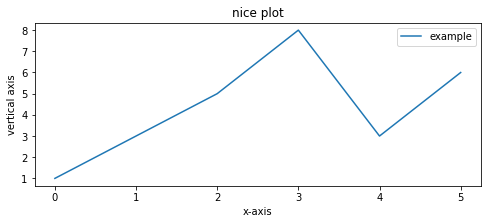

In [8]:
data = pd.DataFrame(data={'example': [1, 3, 5, 8, 3, 6]})
data.plot(title='nice plot', xlabel='x-axis', ylabel='vertical axis', figsize=(8, 3));

### Data from Excel spreadsheets
Lots of data is stored in Excel spreadsheets. Data in an Excel spreadsheet can be read using the `read_excel` function of `pandas`. `read_excel` takes the name of an Excel file as input argument. Many of the keyword arguments are the same as for `read_csv`, including `header`, `index_col`, and `parse_dates`. 

### Exercise 2, Water data
The file `catchment_water_balance_data_ex2.xlsx` contains information on the precipitation, evaporation, and runoff for three areas, so-called catchments. Load the data using `pandas`. Resample the data to compute the monthly mean values.

Make three subplots above each other, one for each catchment, using `plt.subplot`. In each subplot, plot the resampled precipitation, evaporation, and runoff for one catchment. Add a legend to your subplots and place it in the top left corner. Use one loop of length 3 to perform all these tasks. Also add a title to your plots and a label along the vertical-axis.

End your plottings statements with `plt.tight_layout()` (outside the loop), to make sure that labels don't overlap.

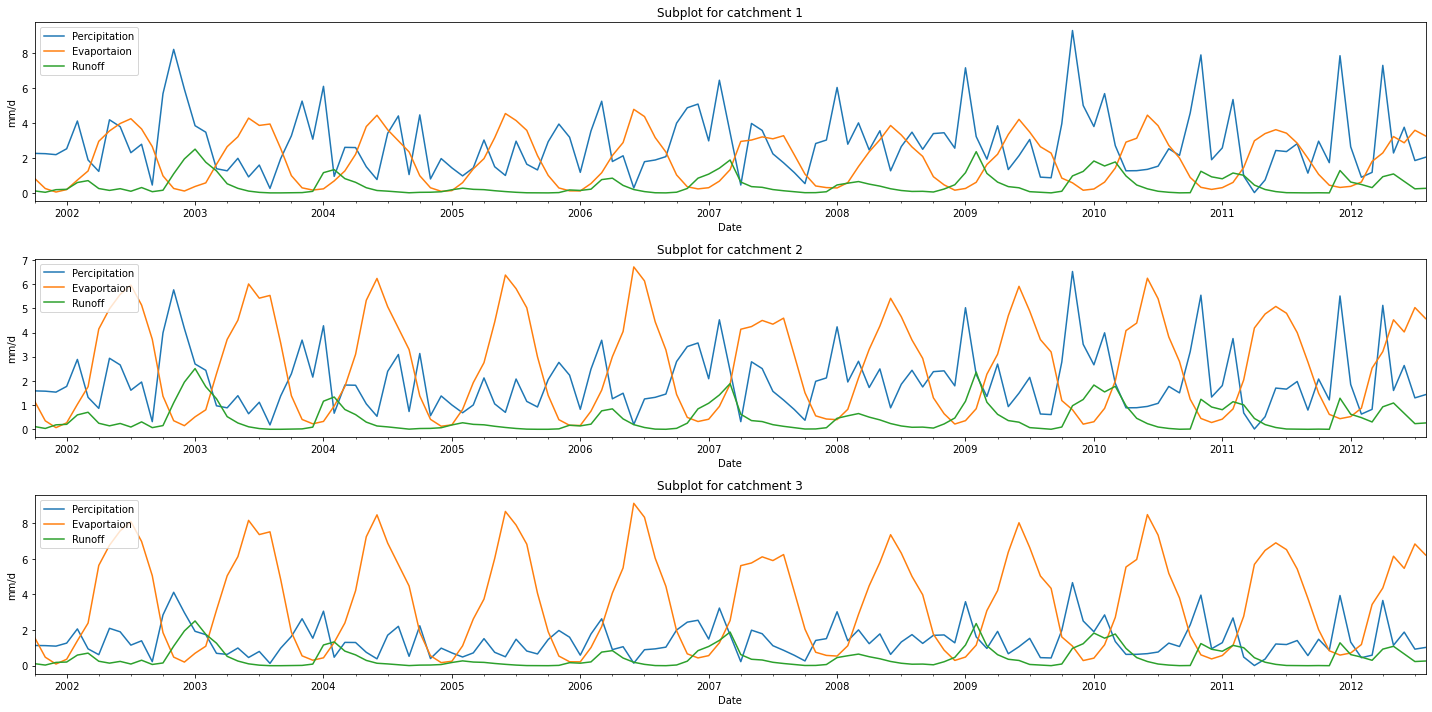

In [9]:
a = pd.read_excel("catchment_water_balance_data_ex2.xlsx", header = 4, index_col = [0], parse_dates = [0], skiprows = [5])
for i in range(3):
    b = a.iloc[:, 3 * i].resample("M").mean()
    c = a.iloc[:, 3 * i + 1].resample("M").mean()
    d = a.iloc[:, 3 * i + 2].resample("M").mean()
    plt.subplot(3, 1, i + 1)
    b.plot(title = f"Subplot for catchment {i + 1}", label = "Percipitation", ylabel = "mm/d", figsize = (20, 10))
    c.plot(label = "Evaportaion")
    d.plot(label = "Runoff")
    plt.legend(loc = 2)
plt.tight_layout()

### Excel files with multiple sheets
Many Excel files have multiple sheets. The `read_excel` function has a keyword argument `sheet_name`. The default of `sheet_name` is 0, which returns the first sheet as a `DataFrame`. Alternatively, the name or names of the sheets that you want to read can be specified. When `sheet_name` is set to `None`, all sheets are read and returned as a dictionary, where the `keys` are the names of the sheets. Each entry in the dictionary is a `DataFrame`.

### Exercise 3, Excel file with multiple sheets
Consider the file `'catchment_water_balance_data_ex3.xlsx'`, which has the same data as for Exercise 2, but now the data for each catchment is stored in a separate Excel sheet. When transferring the data, something went wrong, causing a loss of data for Catchment 3, but you don't have to worry about that now; we will come back to that later. The names of the sheets are the names of the catchments. Load the data again (do this in a separate cell since it can take some time). 

Make the same plots as in Exercise 2 but this time you have to loop over the different sheets. Since all data on each sheet needs to be plotted, plotting can be done with 1 statement, don't forget to add a `ylabel` and the name of the catchment as the title (hint: use the sheetname).

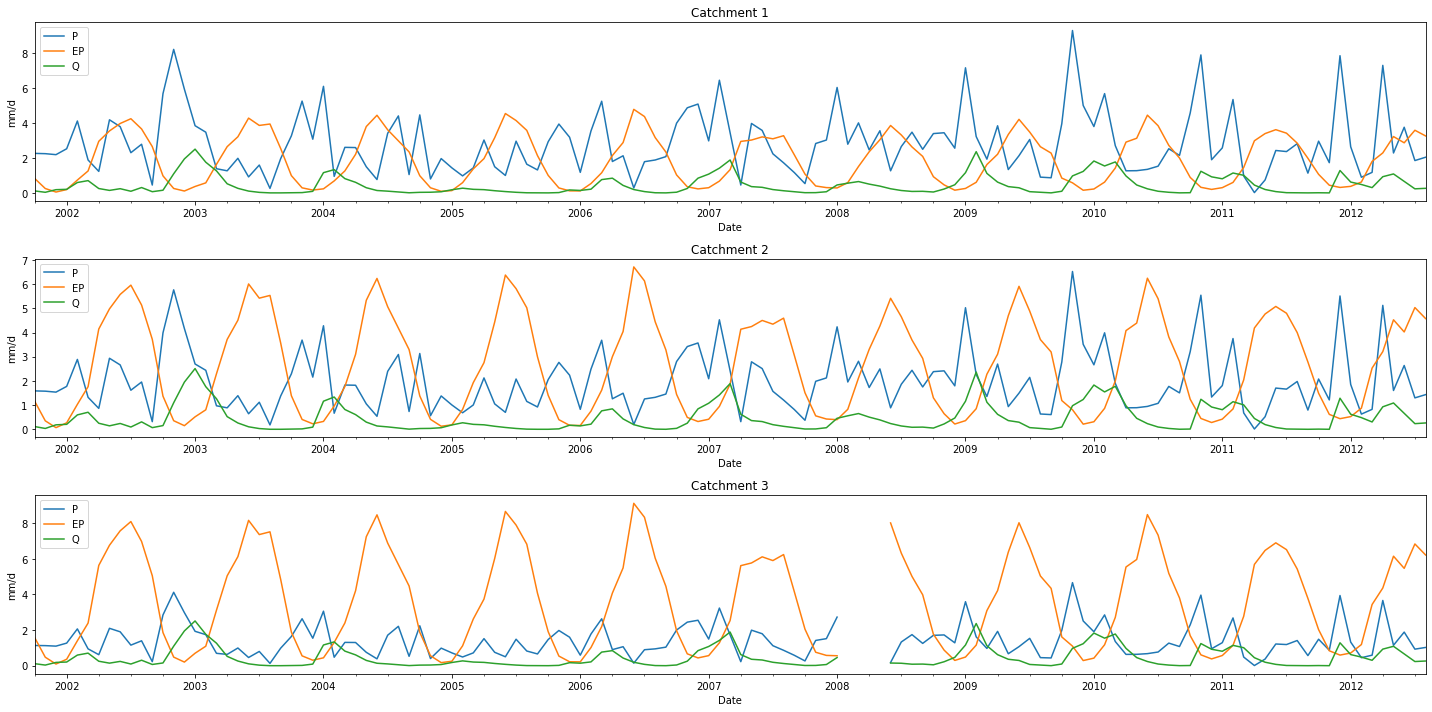

In [12]:
a = pd.read_excel("catchment_water_balance_data_ex3.xlsx", sheet_name = None, header = [3], index_col = [0], parse_dates = [0], skiprows = [4])
for i, j in a.items():
    axi = plt.subplot(3, 1, list(a.keys()).index(i) + 1)
    j = j.dropna(axis = 1, how ="all")
    j.resample("M").mean().plot(ax = axi, ylabel = "mm/d" , title = f"{i}", figsize = (20, 10))
    plt.legend(loc = 2)
plt.tight_layout()

### Exercise 4, separate figures
Plot the data from Exercise 3 again but this time give each catchment a separate figure (this is the default in `pandas` so that only makes things easier). Add a title to the graph stating `Catchment X - Name` where X is the number of the catchment (hint: sheetname) and Name is your name. Save each graph in its own file using `plt.savefig`. The name of each file must be `Catchment X.png`, where `Catchment X` is the name of the catchment (and is the same as the name of the sheet). 

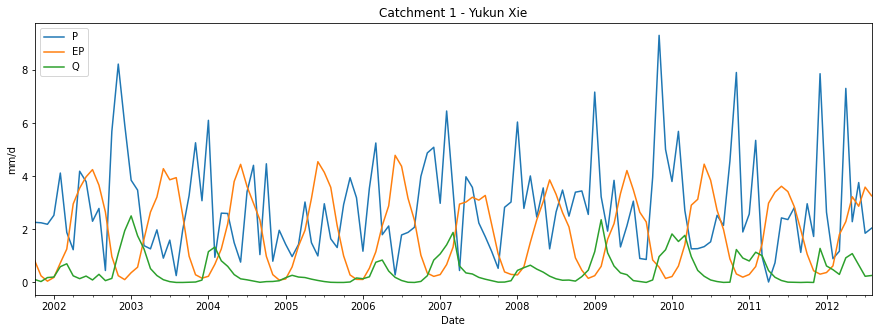

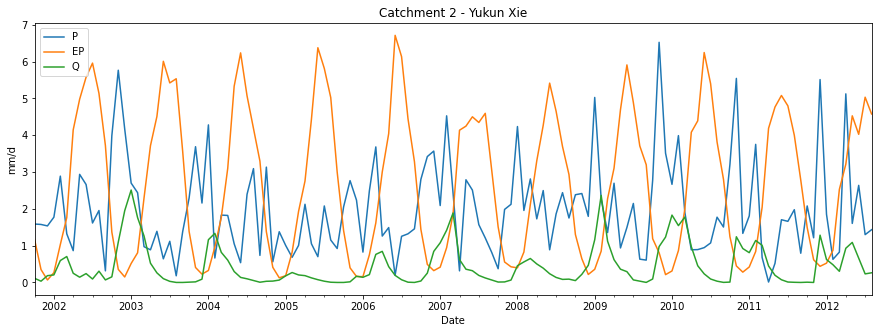

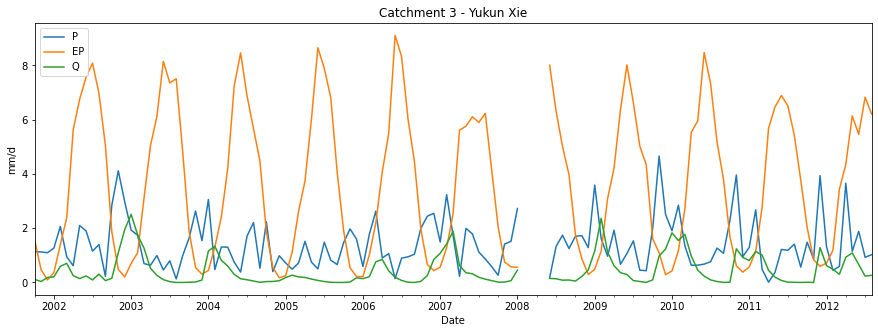

In [16]:
for i, j in a.items():
    j = j.dropna(axis = 1, how ="all")
    j.resample("M").mean().plot(ylabel = "mm/d" , title = f"{i} - Yukun Xie", figsize = (15, 5))
    plt.legend(loc = 2) 
    plt.savefig(f"{i}.png")

### Create a KML file
A KML file (Keyhole Markup Language) can be used to display geographic data on Google Earth or Google Maps. Here, we will use the package `simplekml` to create a KML file. First, we need to install `simplekml`, as it is not part of Anaconda. Open the Anaconda Prompt and type

`pip install simplekml`

After successful installation, the Anaconda prompt can be closed. 

Creation of a simple KML file with points that link to graphs consists of the following steps:
1. Create a `Kml` object with `simplekml.Kml()`
2. Add a graph file to the `Kml` object using the `.addfile` function and store the path
3. Add a new point to the `Kml` object using the `.newpoint` function and store the point
4. Add a description to the point so that the graph will display in the viewer when clicking on the point

### Exercise 5
Install `simplekml` and run the script below. The script below generates a file called `catchments.kmz` (a zipped kml file) provided you created the 3 png files in the previous exercise and gave them the correct names. Next, open the website [http://kmlviewer.nsspot.net](http://kmlviewer.nsspot.net). Drag the `catchments.kmz` file you just created onto the map area of the website. The site will show 3 markers for the 3 catchments you added, these are fictional and not real data but for this exercise we will pretend the data corresponds to the catchments. Click on the different markers to see graphs of the discharge at those locations. Take a screen shot of your favorite graph (which has your name in the title) and edit the `Image` command in the second code cell below so that your graph is shown. **Don't forget to include the file of the screenshot when you submit this notebook.**

In [147]:
import simplekml
coordinates = pd.read_csv('Coordinates.txt', skipinitialspace = True)
print(coordinates)
kmlfile = simplekml.Kml()
for i in range(len(coordinates)):
    meetpunt_id = coordinates.Catchment[i]
    x = coordinates.longitude[i]
    y = coordinates.latitude[i]
    image_name = f'{meetpunt_id}.png'
    path = kmlfile.addfile(image_name)
    point = kmlfile.newpoint(name=meetpunt_id, coords=[[str(x), str(y)]])
    point.description = '<img src="' + path +'" alt={meetpunt_id} width="400" height="300" align="left" />'
    
kmlfile.savekmz('catchments.kmz', format=False)  # create kmz file

     Catchment   River  latitude  longitude
0  Catchment 1  Thames  51.50193    0.54117
1  Catchment 2    Maas  51.88830    4.61969
2  Catchment 3  Amazon  -1.74760  -49.15745


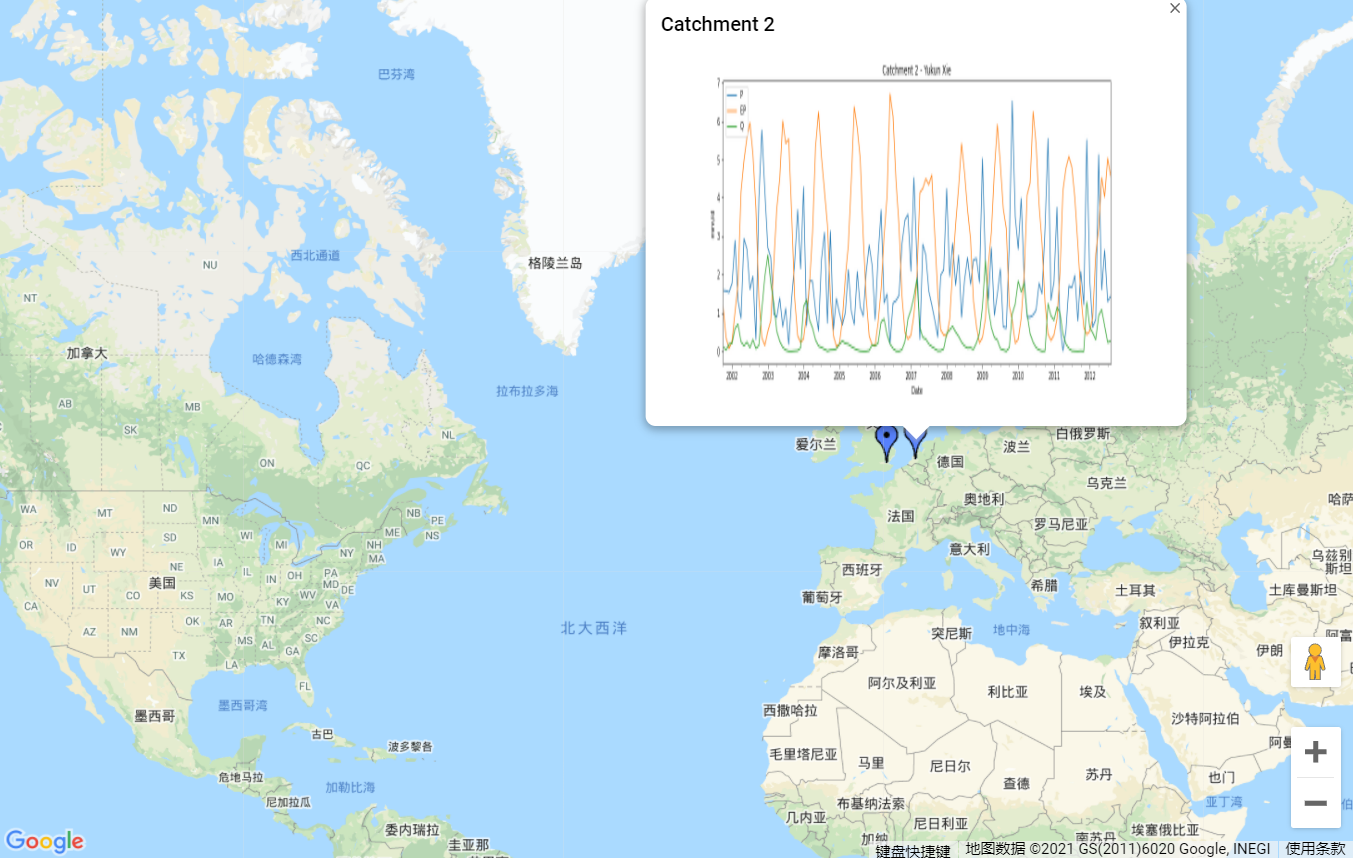

In [108]:
from IPython.display import Image
Image('screenshot_Yukun.png')  # replace with your own image here

### Combining datasets
`pandas` can be used to combine datasets, even when not all data is available. For example, consider a section of road that is 130 m long. The thickness of the asphalt (in cm) is measured at 8 locations along the road. The index is the distance (in m) along the road section.

In [120]:
index = [0, 24, 42, 68, 74, 102, 115, 130]
thickness = [5.2, 5.8, 6.4, 5.3, 6.5, 6, 5.1, 5.0]
df = pd.DataFrame(data=thickness, index=index, columns=['thickness'])
df.index.name = 'distance'
display(df)

thickness
distance           
0               5.2
24              5.8
42              6.4
68              5.3
74              6.5
102             6.0
115             5.1
130             5.0

The strength of the asphalt (in MPa) is measured at a few locations as well, but not at all locations.

In [114]:
index2 = [0, 42, 102, 115]
strength = [24.8, 27.9, 26.4, 26.8]
df2 = pd.DataFrame(data=strength, index=index2, columns=['strength'])
df2.index.name = 'distance'
display(df2)

strength
distance          
0             24.8
42            27.9
102           26.4
115           26.8
120           25.0

The strengths may now be added to the `DataFrame` with the thicknesses. `pandas` will automatically assign the measured strengths to the specified index and will substitute `NaN` (Not a Number) if no strength is measured.

In [121]:
df['strength'] = df2
display(df)

thickness  strength
distance                     
0               5.2      24.8
24              5.8       NaN
42              6.4      27.9
68              5.3       NaN
74              6.5       NaN
102             6.0      26.4
115             5.1      26.8
130             5.0       NaN

You can now create a new `DataFrame` where the rows with `NaN` values are removed (you can also do this inplace by specifying `inplace=True`)

In [133]:
df.dropna()

thickness  strength
distance                     
0               5.2      24.8
42              6.4      27.9
102             6.0      26.4
115             5.1      26.8

Or you can create a new `DataFrame` where interpolation is used to fill the `NaN` values. Note that there are many interpolation options; the default is linear interpolation. 

In [134]:
df.interpolate()

thickness  strength
distance                     
0               5.2     24.80
24              5.8     26.35
42              6.4     27.90
68              5.3     27.40
74              6.5     26.90
102             6.0     26.40
115             5.1     26.80
130             5.0     26.80

The default is that values are interpolated and extrapolated (i.e., the value beyond the last measured value is constant and equal to the last measured value). It is often desirable to interpolate only *between* measured values. This can be done by specifying the keyword argument `limit_area='inside'`

In [135]:
df.interpolate(limit_area='inside')

thickness  strength
distance                     
0               5.2     24.80
24              5.8     26.35
42              6.4     27.90
68              5.3     27.40
74              6.5     26.90
102             6.0     26.40
115             5.1     26.80
130             5.0       NaN

### Exercise 6, Interpolation
Use the daily data from Exercise 3 again. Create a new `DataFrame` with the difference between Catchment 1 and 3. As we have already seen, data from Catchment 3 is missing so you will get NaN values in your new `DataFrame`. Fill these using interpolation. Make three subplots showing the difference in P, EP and Q between Catchments 1 and 3 (use a loop!). The title of each subplot should be `Difference in X` where for X you fill in the variable. Make sure to add a `ylabel`.

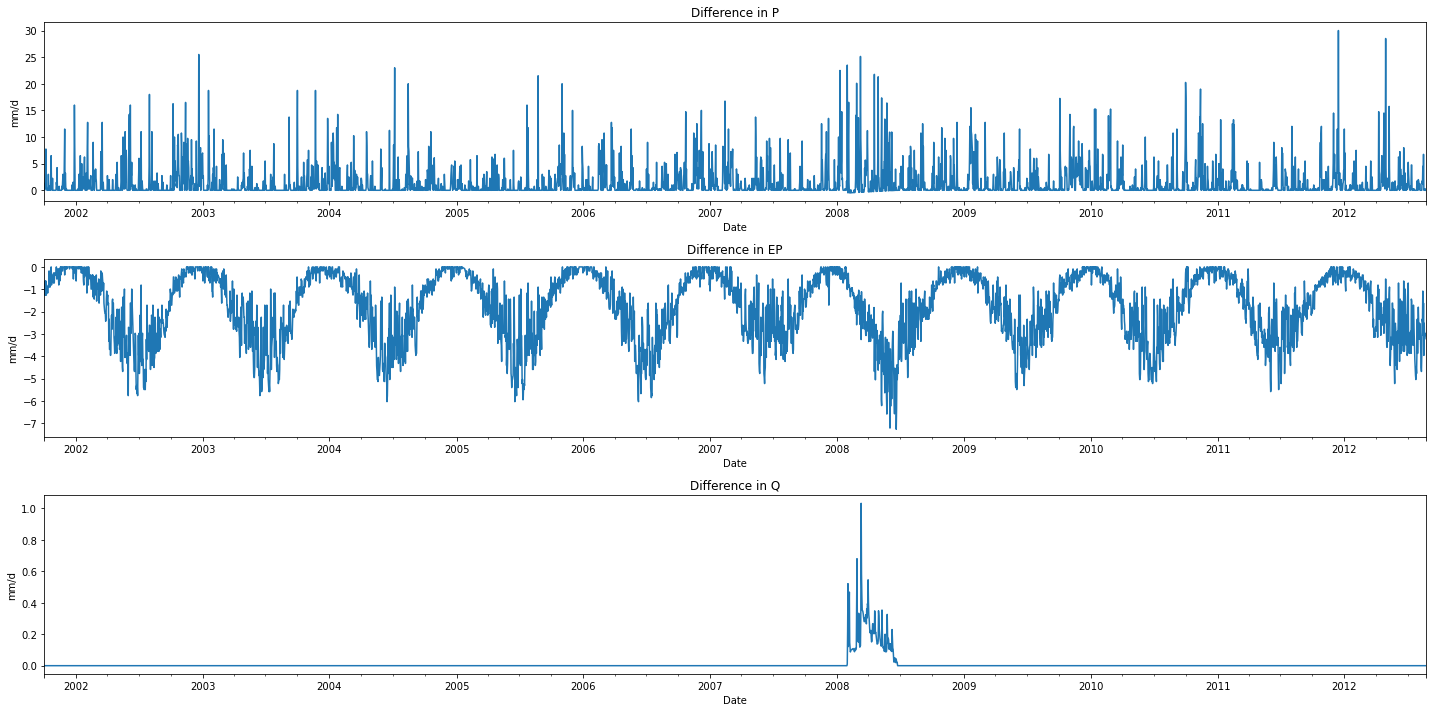

In [19]:
Diff = pd.DataFrame()
list(a.values())[2].interpolate(limit_area='inside', inplace = True)
for i in range(3):
    axi = plt.subplot(3, 1, i + 1)
    nam = list(a.values())[2].columns[i]
    Diff[nam] = a["Catchment 1"].iloc[:, i] - a["Catchment 3"].iloc[:, i]
    Diff[nam].plot(ax = axi, figsize = (20, 10), title = f"Difference in {nam}", ylabel = "mm/d")
plt.tight_layout()

### You are now done. Don't forget to submit the `png` file you created for Execise 5 with your Notebook

### A warning about plotting a `DataFrame` using `plt.subplot`
A `DataFrame` doesn't always want to plot in the current axis. For example, if you have two separate `DataFrame` objects, they don't want to plot in the axes specified with `subplot`

<AxesSubplot:>

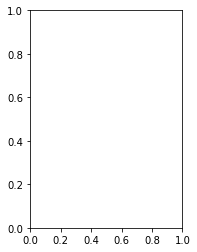

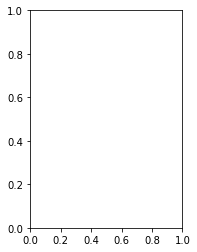

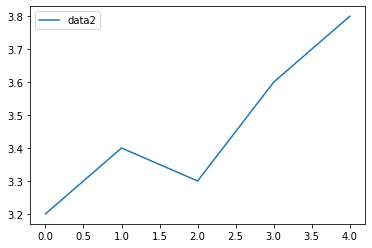

In [139]:
df1 = pd.DataFrame([2, 4, 8, 6, 3], columns=['data1'])
df2 = pd.DataFrame([3.2, 3.4, 3.3, 3.6, 3.8], columns=['data2'])
plt.subplot(1, 2, 1)
df1.plot()
plt.subplot(1, 2, 2)
df2.plot()

Luckily, there is a simple solution: you can explicitly specify the axis where the plot should appear by storing the axis returned by `plt.subplot` in a variable and then giving it to the `plot` function of `pandas`.

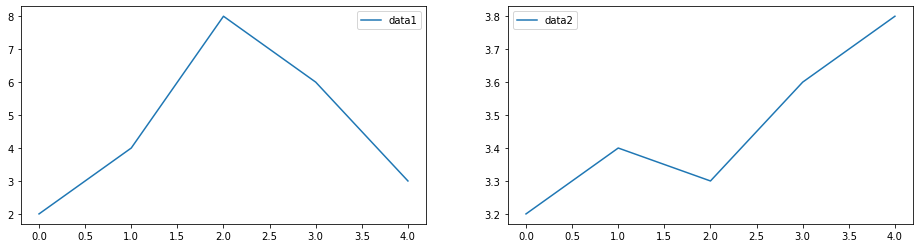

In [140]:
plt.figure(figsize=(16, 4))
ax1 = plt.subplot(1, 2, 1)
df1.plot(ax=ax1)
ax1 = plt.subplot(1, 2, 2)
df2.plot(ax=ax1);